# Tutor Q2

A shaft is supported as shown in Figure 2. The weight of pulley is 1000 N and tensions in the horizontal direction are 3000 N and 1500 N respectively. Design life specification is 10 years of operation, 275 days/year and 18 hour/day at 900 rpm. Bearing at the end of the shaft is taken to be identical 02 series deep groove and inner ring rotates with light shock loading. Determine:

(i) The resultant radial force of bearing A and B

(ii) The correct size of 02 series ball bearing

(iii) The expected rating life of the bearing if 6% probability of failure

(iv) The percentage reduction in median life to improve the reliability of bearing from 90% to 94%

In [1]:
# Required
import matplotlib.pyplot as plt
import numpy as np
from math import pow

In [2]:
print('Weight of the Pulley 1000N')
print('tensions in the horizontal direction are 3000 N and 1500 N')

print('Bearing Type: Deep-groove ball bearing')
a_bearingType = 3
# Fr = 9000
# Fa = 0
n_rpm = 900
print('Inner ring rotate, V=1.0')
V_rotationFactor = 1.0
print('Light shock for ball bearing, Ks=1.5')
Ks = 1.5

Weight of the Pulley 1000N
tensions in the horizontal direction are 3000 N and 1500 N
Bearing Type: Deep-groove ball bearing
Inner ring rotate, V=1.0
Light shock for ball bearing, Ks=1.5


Rating life

$$L_{10}=10*275*18 hours$$

In [3]:
L10 = 10*275*18
print(f'Rating life, L10 = {L10}hours')

Rating life, L10 = 49500hours


(i) The resultant radial force of bearing A and B

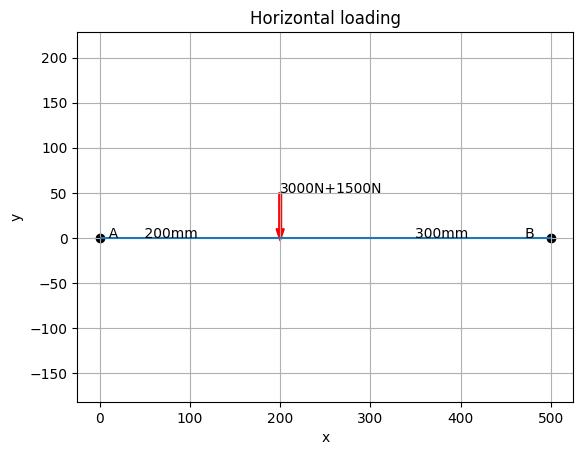

In [4]:
coorA = [0,0]
coorB = [500,0]
loadLocation = [200,0]

data = np.array([coorA,coorB])
x, y = data.T
fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
ax.arrow(loadLocation[0],loadLocation[1]+50, 0,-40,width=3,color='r')
ax.hlines(0,0,500)

ax.set(xlabel='x', ylabel='y',
       title='Horizontal loading')

ax.text(loadLocation[0],loadLocation[1]+50,f'3000N+1500N')
ax.text(coorA[0],coorA[1],f'  A      200mm')
ax.text(coorB[0]-150,coorB[1],f'300mm             B')

plt.axis('equal')
plt.show()

$$+\uparrow \sum F_x=0$$
$$A_x+B_x-4500=0$$

$$+\circlearrowleft \sum M_b=0$$
$$-A_x(500)+4500(300)=0$$
$$A_x=4500*300/500$$

In [5]:
A_x=4500*300/500
print(f'Ax={A_x}N')

Ax=2700.0N


$$2700+B_x-4500=0$$

In [6]:
B_x=4500-A_x
print(f'Bx={B_x}N')

Bx=1800.0N


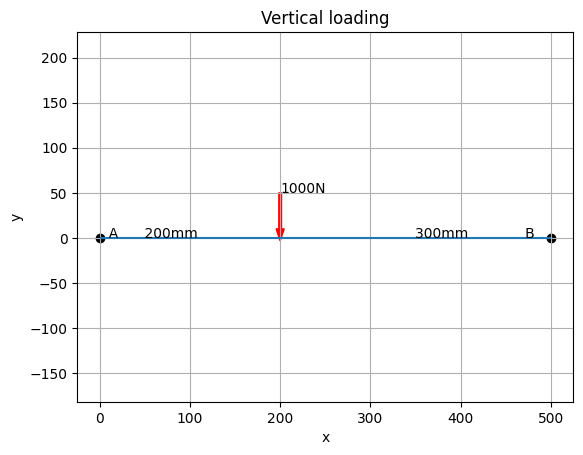

In [7]:
coorA = [0,0]
coorB = [500,0]
loadLocation = [200,0]

data = np.array([coorA,coorB])
x, y = data.T
fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
ax.arrow(loadLocation[0],loadLocation[1]+50, 0,-40,width=3,color='r')
ax.hlines(0,0,500)

ax.set(xlabel='x', ylabel='y',
       title='Vertical loading')

ax.text(loadLocation[0],loadLocation[1]+50,f'1000N')
ax.text(coorA[0],coorA[1],f'  A      200mm')
ax.text(coorB[0]-150,coorB[1],f'300mm             B')

plt.axis('equal')
plt.show()

$$+\uparrow \sum F_y=0$$
$$A_y+B_y-1000=0$$

$$+\circlearrowleft \sum M_b=0$$
$$-A_y(500)+1000(300)=0$$
$$A_y=1000*300/500$$

In [8]:
A_y=1000*300/500
print(f'Ay={A_y}N')

Ay=600.0N


$$600+B_y-1000=0$$

In [9]:
B_y=1000-A_y
print(f'By={B_y}N')

By=400.0N


In [ ]:
print('Resultant Radial Force at Bearing A and B')
A_total = np.hypot(A_x,A_y)
B_total = np.hypot(B_x,B_y)
print(f'A={A_total}N')
print(f'C={B_total}N')

Resultant Radial Force at Bearing A and B
A=2765.8633371878664N
C=1843.9088914585775N


(ii) The correct size of 02 series ball bearing

Base on rating life equation
$$L_{10} = \frac{106}{60*n_{rpm}} \left( \frac{C}{P} \right)^a$$

We already calculated the rating life.
To find bearing size, we need to find C.

In [11]:
print('Find equivalent radial load when we know Fr')

Find equivalent radial load when we know Fr


$$P=K_s(XVF_r+YF_a)$$

No Axial Force, thus the equation becomes.
$$
P=K_sXVF_r
$$
$$P=(1.5)(1)(1.2)F_r$$

In [12]:
Fr=A_total
print(f'Considered Radial load is at A, Fr={Fr:.2f}N')
print('because the radial load at A is larger than at B')

Considered Radial load is at A, Fr=2765.86N
because the radial load at A is larger than at B


In [13]:
P=Ks*(1*V_rotationFactor*Fr)
print(f'Equivalent Radial Load, P={P}')

Equivalent Radial Load, P=4148.7950057818


Substitute into rating life equation to find C

C is used to find bearing size

$$49500 = \frac{10^6}{60*900} \left( \frac{C}{4148.8} \right)^3$$

In [14]:
C_toFind = pow(L10*60*n_rpm/(1E+6),1/3)*P
print(f'C={C_toFind:.2f}N')
print('Find minimum C value above the value of C')

C=57577.79N
Find minimum C value above the value of C


Table 3.1

| D | C (kN) | 
|:--------:|:--------:|
|  65   |  55.5   |
|  **70**   |  61.8   |

In [15]:
print('The suitable bearing size is 70mm')

The suitable bearing size is 70mm


(iii) The expected rating life of the bearing if 6% probability of failure

6% probability of failure = 94% reliability

From Figure 3.1, Graph of reliability factor, Kr =0.71

Rating life consider reliability factor

$$L_5 = K_r \left( \frac{C}{P} \right)^a$$

This equation is in revolution. If rating life in hours.

$$L_5 = K_r \frac{10^6}{60*900} \left( \frac{C}{P} \right)^a$$


$$L_5 = 0.71 \frac{10^6}{60*900} \left( \frac{57577.8}{4148.8} \right)^3$$

In [17]:
Kr = 0.71
L_5 = Kr*1E+6/(60*n_rpm)*pow(C_toFind/P,3)
print(f'Rating life for 6% failure, L5 = {L_5:.0f}hours')

Rating life for 6% failure, L5 = 35145hours


(iv) The percentage reduction in median life to improve the reliability of bearing from 90% to 94%

In [19]:
print(f'Median life for 90% Reliability 5L10={5*L10} hours')
print(f'Median life for 94% Reliability 5L10={5*L_5:.0f} hours')

Median life for 90% Reliability 5L10=247500 hours
Median life for 94% Reliability 5L10=175725 hours


Percentage of reduction

$$Reduction = \frac{5L_{10}-5L_5}{5L_{10}} \times 100percent$$

In [23]:
percentReduction = ((5*L10)-(5*L_5))/(5*L10)*100
print(f'Percentage of reduction is {percentReduction:.0f}%')

Percentage of reduction is 29%
